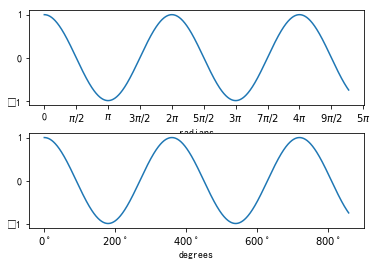

In [2]:
#Radian ticks

import numpy as np
from basic_units import radians, degrees, cos
from matplotlib.pyplot import figure, show

x = [val*radians for val in np.arange(0, 15, 0.01)]

fig = figure()
fig.subplots_adjust(hspace=0.3)

ax = fig.add_subplot(211)
line1, = ax.plot(x, cos(x), xunits=radians)

ax = fig.add_subplot(212)
line2, = ax.plot(x, cos(x), xunits=degrees)

show()

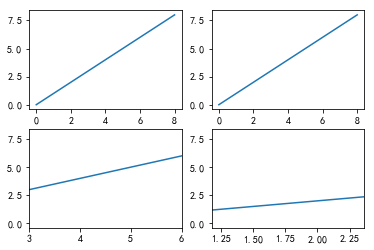

In [3]:
#Inches and Centimeters

from basic_units import cm, inch
import matplotlib.pyplot as plt
import numpy as np

cms = cm * np.arange(0, 10, 2)

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(cms, cms)

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(cms, cms, xunits=cm, yunits=inch)

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(cms, cms, xunits=inch, yunits=cm)
ax3.set_xlim(3, 6)  # scalars are interpreted in current units

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(cms, cms, xunits=inch, yunits=inch)
ax4.set_xlim(3*cm, 6*cm)  # cm are converted to inches

plt.show()

/Users/Ken/Library/Python/3.6/lib/python/site-packages/numpy/ma/core.py:2809: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


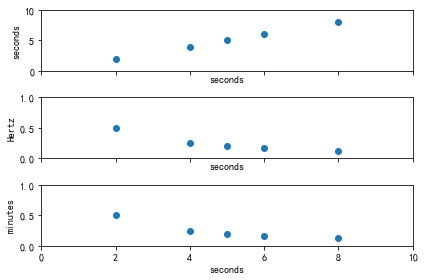

In [4]:
#Unit handling

import numpy as np
import matplotlib.pyplot as plt
from basic_units import secs, hertz, minutes

# create masked array
data = (1, 2, 3, 4, 5, 6, 7, 8)
mask = (1, 0, 1, 0, 0, 0, 1, 0)
xsecs = secs * np.ma.MaskedArray(data, mask, float)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True)
ax1.scatter(xsecs, xsecs)
ax1.yaxis.set_units(secs)
ax1.axis([0, 10, 0, 10])

ax2.scatter(xsecs, xsecs, yunits=hertz)
ax2.axis([0, 10, 0, 1])

ax3.scatter(xsecs, xsecs, yunits=hertz)
ax3.yaxis.set_units(minutes)
ax3.axis([0, 10, 0, 1])

fig.tight_layout()
plt.show()

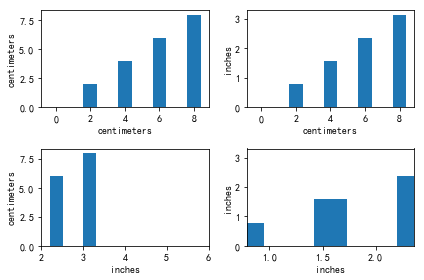

In [5]:
#Bar demo with units

import numpy as np
from basic_units import cm, inch
import matplotlib.pyplot as plt

cms = cm * np.arange(0, 10, 2)
bottom = 0 * cm
width = 0.8 * cm

fig, axs = plt.subplots(2, 2)

axs[0, 0].bar(cms, cms, bottom=bottom)

axs[0, 1].bar(cms, cms, bottom=bottom, width=width, xunits=cm, yunits=inch)

axs[1, 0].bar(cms, cms, bottom=bottom, width=width, xunits=inch, yunits=cm)
axs[1, 0].set_xlim(2, 6)  # scalars are interpreted in current units

axs[1, 1].bar(cms, cms, bottom=bottom, width=width, xunits=inch, yunits=inch)
axs[1, 1].set_xlim(2 * cm, 6 * cm)  # cm are converted to inches

fig.tight_layout()
plt.show()

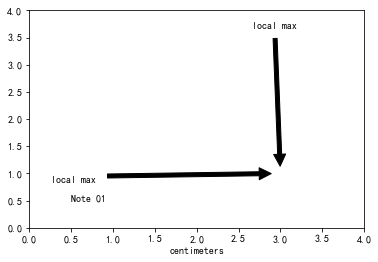

In [6]:
#Annotation with units
import matplotlib.pyplot as plt
from basic_units import cm

fig, ax = plt.subplots()

ax.annotate("Note 01", [0.5*cm, 0.5*cm])

# xy and text both unitized
ax.annotate('local max', xy=(3*cm, 1*cm), xycoords='data',
            xytext=(0.8*cm, 0.95*cm), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

# mixing units w/ nonunits
ax.annotate('local max', xy=(3*cm, 1*cm), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')


ax.set_xlim(0*cm, 4*cm)
ax.set_ylim(0*cm, 4*cm)
plt.show()

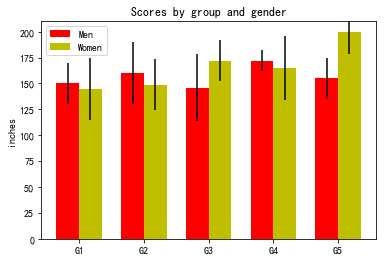

In [7]:
#Group barchart with units
import numpy as np
from basic_units import cm, inch
import matplotlib.pyplot as plt


N = 5
menMeans = (150*cm, 160*cm, 146*cm, 172*cm, 155*cm)
menStd = (20*cm, 30*cm, 32*cm, 10*cm, 20*cm)

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, menMeans, width, color='r', bottom=0*cm, yerr=menStd)


womenMeans = (145*cm, 149*cm, 172*cm, 165*cm, 200*cm)
womenStd = (30*cm, 25*cm, 20*cm, 31*cm, 22*cm)
p2 = ax.bar(ind + width, womenMeans, width,
            color='y', bottom=0*cm, yerr=womenStd)

ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((p1[0], p2[0]), ('Men', 'Women'))
ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.show()

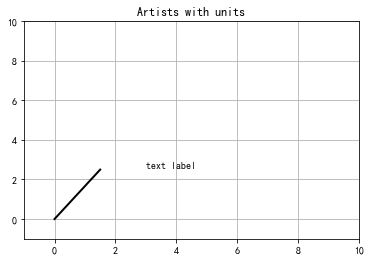

In [8]:
#Artist tests
import random
import matplotlib.lines as lines
import matplotlib.patches as patches
import matplotlib.text as text
import matplotlib.collections as collections

from basic_units import cm, inch
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.xaxis.set_units(cm)
ax.yaxis.set_units(cm)

# Fixing random state for reproducibility
np.random.seed(19680801)

if 0:
    # test a line collection
    # Not supported at present.
    verts = []
    for i in range(10):
        # a random line segment in inches
        verts.append(zip(*inch*10*np.random.rand(2, random.randint(2, 15))))
    lc = collections.LineCollection(verts, axes=ax)
    ax.add_collection(lc)

# test a plain-ol-line
line = lines.Line2D([0*cm, 1.5*cm], [0*cm, 2.5*cm],
                    lw=2, color='black', axes=ax)
ax.add_line(line)

if 0:
    # test a patch
    # Not supported at present.
    rect = patches.Rectangle((1*cm, 1*cm), width=5*cm, height=2*cm,
                             alpha=0.2, axes=ax)
    ax.add_patch(rect)


t = text.Text(3*cm, 2.5*cm, 'text label', ha='left', va='bottom', axes=ax)
ax.add_artist(t)

ax.set_xlim(-1*cm, 10*cm)
ax.set_ylim(-1*cm, 10*cm)
# ax.xaxis.set_units(inch)
ax.grid(True)
ax.set_title("Artists with units")
plt.show()

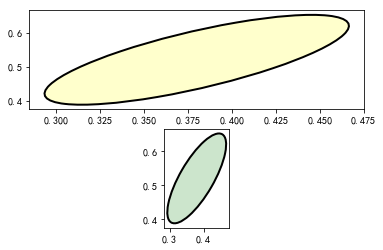

In [14]:
#Ellipse With Units

from basic_units import cm
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt


xcenter, ycenter = 0.38*cm, 0.52*cm
width, height = 1e-1*cm, 3e-1*cm
angle = -30

theta = np.deg2rad(np.arange(0.0, 360.0, 1.0))
x = 0.5 * width * np.cos(theta)
y = 0.5 * height * np.sin(theta)

rtheta = np.radians(angle)
R = np.array([
    [np.cos(rtheta), -np.sin(rtheta)],
    [np.sin(rtheta),  np.cos(rtheta)],
    ])


x, y = np.dot(R, np.array([x, y]))
x += xcenter
y += ycenter
fig = plt.figure()
ax = fig.add_subplot(211, aspect='auto')
ax.fill(x, y, alpha=0.2, facecolor='yellow',
        edgecolor='yellow', linewidth=1, zorder=1)

e1 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)

ax.add_patch(e1)

ax = fig.add_subplot(212, aspect='equal')
ax.fill(x, y, alpha=0.2, facecolor='green', edgecolor='green', zorder=1)
e2 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)


ax.add_patch(e2)
fig.savefig('ellipse_compare')

plt.show()

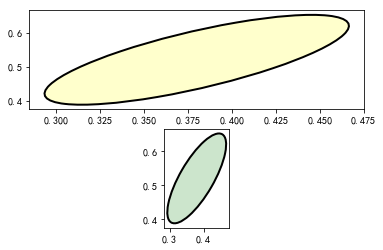

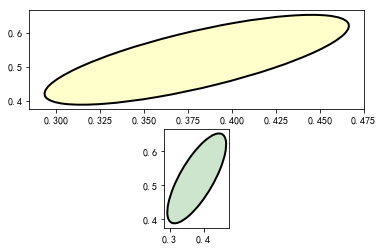

In [13]:
fig = plt.figure()
ax = fig.add_subplot(211, aspect='auto')
ax.fill(x, y, alpha=0.2, facecolor='yellow',
        edgecolor='yellow', linewidth=1, zorder=1)

e1 = patches.Arc((xcenter, ycenter), width, height,
                 angle=angle, linewidth=2, fill=False, zorder=2)

ax.add_patch(e1)

ax = fig.add_subplot(212, aspect='equal')
ax.fill(x, y, alpha=0.2, facecolor='green', edgecolor='green', zorder=1)
e2 = patches.Arc((xcenter, ycenter), width, height,
                 angle=angle, linewidth=2, fill=False, zorder=2)


ax.add_patch(e2)
fig.savefig('arc_compare')

plt.show()

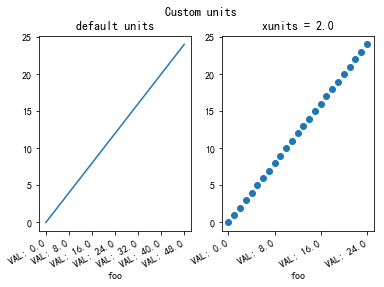

In [15]:
#Evans test
from matplotlib.cbook import iterable
import matplotlib.units as units
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt


class Foo(object):
    def __init__(self, val, unit=1.0):
        self.unit = unit
        self._val = val * unit

    def value(self, unit):
        if unit is None:
            unit = self.unit
        return self._val / unit


class FooConverter(object):
    @staticmethod
    def axisinfo(unit, axis):
        'return the Foo AxisInfo'
        if unit == 1.0 or unit == 2.0:
            return units.AxisInfo(
                majloc=ticker.IndexLocator(8, 0),
                majfmt=ticker.FormatStrFormatter("VAL: %s"),
                label='foo',
                )

        else:
            return None

    @staticmethod
    def convert(obj, unit, axis):
        """
        convert obj using unit.  If obj is a sequence, return the
        converted sequence
        """
        if units.ConversionInterface.is_numlike(obj):
            return obj

        if iterable(obj):
            return [o.value(unit) for o in obj]
        else:
            return obj.value(unit)

    @staticmethod
    def default_units(x, axis):
        'return the default unit for x or None'
        if iterable(x):
            for thisx in x:
                return thisx.unit
        else:
            return x.unit


units.registry[Foo] = FooConverter()

# create some Foos
x = []
for val in range(0, 50, 2):
    x.append(Foo(val, 1.0))

# and some arbitrary y data
y = [i for i in range(len(x))]


# plot specifying units
fig = plt.figure()
fig.suptitle("Custom units")
fig.subplots_adjust(bottom=0.2)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x, y, 'o', xunits=2.0)
for label in ax.get_xticklabels():
    label.set_rotation(30)
    label.set_ha('right')
ax.set_title("xunits = 2.0")


# plot without specifying units; will use the None branch for axisinfo
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, y)  # uses default units
ax.set_title('default units')
for label in ax.get_xticklabels():
    label.set_rotation(30)
    label.set_ha('right')

plt.show()

In [ ]:
#Basic Units

import six

import math

import numpy as np

import matplotlib.units as units
import matplotlib.ticker as ticker
from matplotlib.axes import Axes
from matplotlib.cbook import iterable


class ProxyDelegate(object):
    def __init__(self, fn_name, proxy_type):
        self.proxy_type = proxy_type
        self.fn_name = fn_name

    def __get__(self, obj, objtype=None):
        return self.proxy_type(self.fn_name, obj)


class TaggedValueMeta(type):
    def __init__(cls, name, bases, dict):
        for fn_name in cls._proxies:
            try:
                dummy = getattr(cls, fn_name)
            except AttributeError:
                setattr(cls, fn_name,
                        ProxyDelegate(fn_name, cls._proxies[fn_name]))


class PassThroughProxy(object):
    def __init__(self, fn_name, obj):
        self.fn_name = fn_name
        self.target = obj.proxy_target

    def __call__(self, *args):
        fn = getattr(self.target, self.fn_name)
        ret = fn(*args)
        return ret


class ConvertArgsProxy(PassThroughProxy):
    def __init__(self, fn_name, obj):
        PassThroughProxy.__init__(self, fn_name, obj)
        self.unit = obj.unit

    def __call__(self, *args):
        converted_args = []
        for a in args:
            try:
                converted_args.append(a.convert_to(self.unit))
            except AttributeError:
                converted_args.append(TaggedValue(a, self.unit))
        converted_args = tuple([c.get_value() for c in converted_args])
        return PassThroughProxy.__call__(self, *converted_args)


class ConvertReturnProxy(PassThroughProxy):
    def __init__(self, fn_name, obj):
        PassThroughProxy.__init__(self, fn_name, obj)
        self.unit = obj.unit

    def __call__(self, *args):
        ret = PassThroughProxy.__call__(self, *args)
        return (NotImplemented if ret is NotImplemented
                else TaggedValue(ret, self.unit))


class ConvertAllProxy(PassThroughProxy):
    def __init__(self, fn_name, obj):
        PassThroughProxy.__init__(self, fn_name, obj)
        self.unit = obj.unit

    def __call__(self, *args):
        converted_args = []
        arg_units = [self.unit]
        for a in args:
            if hasattr(a, 'get_unit') and not hasattr(a, 'convert_to'):
                # if this arg has a unit type but no conversion ability,
                # this operation is prohibited
                return NotImplemented

            if hasattr(a, 'convert_to'):
                try:
                    a = a.convert_to(self.unit)
                except:
                    pass
                arg_units.append(a.get_unit())
                converted_args.append(a.get_value())
            else:
                converted_args.append(a)
                if hasattr(a, 'get_unit'):
                    arg_units.append(a.get_unit())
                else:
                    arg_units.append(None)
        converted_args = tuple(converted_args)
        ret = PassThroughProxy.__call__(self, *converted_args)
        if ret is NotImplemented:
            return NotImplemented
        ret_unit = unit_resolver(self.fn_name, arg_units)
        if ret_unit is NotImplemented:
            return NotImplemented
        return TaggedValue(ret, ret_unit)


class TaggedValue(six.with_metaclass(TaggedValueMeta)):

    _proxies = {'__add__': ConvertAllProxy,
                '__sub__': ConvertAllProxy,
                '__mul__': ConvertAllProxy,
                '__rmul__': ConvertAllProxy,
                '__cmp__': ConvertAllProxy,
                '__lt__': ConvertAllProxy,
                '__gt__': ConvertAllProxy,
                '__len__': PassThroughProxy}

    def __new__(cls, value, unit):
        # generate a new subclass for value
        value_class = type(value)
        try:
            subcls = type('TaggedValue_of_%s' % (value_class.__name__),
                          tuple([cls, value_class]),
                          {})
            if subcls not in units.registry:
                units.registry[subcls] = basicConverter
            return object.__new__(subcls)
        except TypeError:
            if cls not in units.registry:
                units.registry[cls] = basicConverter
            return object.__new__(cls)

    def __init__(self, value, unit):
        self.value = value
        self.unit = unit
        self.proxy_target = self.value

    def __getattribute__(self, name):
        if name.startswith('__'):
            return object.__getattribute__(self, name)
        variable = object.__getattribute__(self, 'value')
        if hasattr(variable, name) and name not in self.__class__.__dict__:
            return getattr(variable, name)
        return object.__getattribute__(self, name)

    def __array__(self, dtype=object):
        return np.asarray(self.value).astype(dtype)

    def __array_wrap__(self, array, context):
        return TaggedValue(array, self.unit)

    def __repr__(self):
        return 'TaggedValue(' + repr(self.value) + ', ' + repr(self.unit) + ')'

    def __str__(self):
        return str(self.value) + ' in ' + str(self.unit)

    def __len__(self):
        return len(self.value)

    def __iter__(self):
        # Return a generator expression rather than use `yield`, so that
        # TypeError is raised by iter(self) if appropriate when checking for
        # iterability.
        return (TaggedValue(inner, self.unit) for inner in self.value)

    def get_compressed_copy(self, mask):
        new_value = np.ma.masked_array(self.value, mask=mask).compressed()
        return TaggedValue(new_value, self.unit)

    def convert_to(self, unit):
        if unit == self.unit or not unit:
            return self
        new_value = self.unit.convert_value_to(self.value, unit)
        return TaggedValue(new_value, unit)

    def get_value(self):
        return self.value

    def get_unit(self):
        return self.unit


class BasicUnit(object):
    def __init__(self, name, fullname=None):
        self.name = name
        if fullname is None:
            fullname = name
        self.fullname = fullname
        self.conversions = dict()

    def __repr__(self):
        return 'BasicUnit(%s)' % self.name

    def __str__(self):
        return self.fullname

    def __call__(self, value):
        return TaggedValue(value, self)

    def __mul__(self, rhs):
        value = rhs
        unit = self
        if hasattr(rhs, 'get_unit'):
            value = rhs.get_value()
            unit = rhs.get_unit()
            unit = unit_resolver('__mul__', (self, unit))
        if unit is NotImplemented:
            return NotImplemented
        return TaggedValue(value, unit)

    def __rmul__(self, lhs):
        return self*lhs

    def __array_wrap__(self, array, context):
        return TaggedValue(array, self)

    def __array__(self, t=None, context=None):
        ret = np.array([1])
        if t is not None:
            return ret.astype(t)
        else:
            return ret

    def add_conversion_factor(self, unit, factor):
        def convert(x):
            return x*factor
        self.conversions[unit] = convert

    def add_conversion_fn(self, unit, fn):
        self.conversions[unit] = fn

    def get_conversion_fn(self, unit):
        return self.conversions[unit]

    def convert_value_to(self, value, unit):
        conversion_fn = self.conversions[unit]
        ret = conversion_fn(value)
        return ret

    def get_unit(self):
        return self


class UnitResolver(object):
    def addition_rule(self, units):
        for unit_1, unit_2 in zip(units[:-1], units[1:]):
            if (unit_1 != unit_2):
                return NotImplemented
        return units[0]

    def multiplication_rule(self, units):
        non_null = [u for u in units if u]
        if (len(non_null) > 1):
            return NotImplemented
        return non_null[0]

    op_dict = {
        '__mul__': multiplication_rule,
        '__rmul__': multiplication_rule,
        '__add__': addition_rule,
        '__radd__': addition_rule,
        '__sub__': addition_rule,
        '__rsub__': addition_rule}

    def __call__(self, operation, units):
        if (operation not in self.op_dict):
            return NotImplemented

        return self.op_dict[operation](self, units)


unit_resolver = UnitResolver()

cm = BasicUnit('cm', 'centimeters')
inch = BasicUnit('inch', 'inches')
inch.add_conversion_factor(cm, 2.54)
cm.add_conversion_factor(inch, 1/2.54)

radians = BasicUnit('rad', 'radians')
degrees = BasicUnit('deg', 'degrees')
radians.add_conversion_factor(degrees, 180.0/np.pi)
degrees.add_conversion_factor(radians, np.pi/180.0)

secs = BasicUnit('s', 'seconds')
hertz = BasicUnit('Hz', 'Hertz')
minutes = BasicUnit('min', 'minutes')

secs.add_conversion_fn(hertz, lambda x: 1./x)
secs.add_conversion_factor(minutes, 1/60.0)


# radians formatting
def rad_fn(x, pos=None):
    n = int((x / np.pi) * 2.0 + 0.25)
    if n == 0:
        return '0'
    elif n == 1:
        return r'$\pi/2$'
    elif n == 2:
        return r'$\pi$'
    elif n % 2 == 0:
        return r'$%s\pi$' % (n//2,)
    else:
        return r'$%s\pi/2$' % (n,)


class BasicUnitConverter(units.ConversionInterface):
    @staticmethod
    def axisinfo(unit, axis):
        'return AxisInfo instance for x and unit'

        if unit == radians:
            return units.AxisInfo(
                majloc=ticker.MultipleLocator(base=np.pi/2),
                majfmt=ticker.FuncFormatter(rad_fn),
                label=unit.fullname,
            )
        elif unit == degrees:
            return units.AxisInfo(
                majloc=ticker.AutoLocator(),
                majfmt=ticker.FormatStrFormatter(r'$%i^\circ$'),
                label=unit.fullname,
            )
        elif unit is not None:
            if hasattr(unit, 'fullname'):
                return units.AxisInfo(label=unit.fullname)
            elif hasattr(unit, 'unit'):
                return units.AxisInfo(label=unit.unit.fullname)
        return None

    @staticmethod
    def convert(val, unit, axis):
        if units.ConversionInterface.is_numlike(val):
            return val
        if iterable(val):
            return [thisval.convert_to(unit).get_value() for thisval in val]
        else:
            return val.convert_to(unit).get_value()

    @staticmethod
    def default_units(x, axis):
        'return the default unit for x or None'
        if iterable(x):
            for thisx in x:
                return thisx.unit
        return x.unit


def cos(x):
    if iterable(x):
        return [math.cos(val.convert_to(radians).get_value()) for val in x]
    else:
        return math.cos(x.convert_to(radians).get_value())


basicConverter = BasicUnitConverter()
units.registry[BasicUnit] = basicConverter
units.registry[TaggedValue] = basicConverter